In [57]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Time Series Analysis and Exploration
- A time-series is a set of observations on a quantitative variable collected over time.
- In time series analysis, we analyze the past behavior of a variable in order to predict its future behavior.
- An analysis of the trend of the observations is needed to acquire an understanding of the progress of events leading to prevailing conditions.
- Accurate trend spotting can only be determined if the data are available for a sufficient  length of time.
- Time series examples:
    - Sales data
    - Gross national product
    - Share prices
    - $A Exchange rate
    - Unemployment rates
    - Population
    - Foreign debt
    - Interest rates

## Time Series Components
- Time series data can be broken into these four components:
    - Secular trend
    - Seasonal variation
    - Cyclical variation
    - Irregular variation
1. **Secular trend:** 
    - This is the long term growth or decline of the series.
    - Secular trend identifies the underlying trend(direction) of the data:- increasing, decreasing, or  remains constant.
    - It's the long term direction of the data , usually described by the "line of best fit"
    - While trend estimates are often reliable, in some instances the usefulness estimates is reduced by:
        - High degree of irregularity in original or seasonally adjusted series or
        - Abrupt change in the time series characteristics of the original data.
2. **Seasonality Variation:**
    - The seasonal variation of a time series is a pattern of change that recurs regularly over time.
    - Seasonal variations are  usually due to the differences between seasons and to festive occasions such as Easter and Christmas.
    - Examples include:
        - Air conditioner sales in Summer
        - Heater sales in Winter
        - Flu cases in Winter
        - Airline tickets for flights during school vacations
3. **Cyclic Variations:**
    - Cyclical variations also have recurring patterns but with a longer and more erratic time scale compared to Seasonal variations.
    - The name is quite misleading because these cycles can be far from regular and it is usually impossible to predict just how long periods of expansion or contraction will be.
    - There is no guarantee of a regularly returning pattern. 
4. **Irregular Variations:**
    - An irregular (or random) variation in a time series occurs over varying (usually short) periods.
    - It follows no pattern and is by nature unpredictable.
    - It usually occurs randomly and may be linked to events that also occur randomly.
    - Irregular variation cannot be explained mathematically.
    - If the variation cannot be accounted for by secular trend, season or cyclical variation, then it is usually attributed to irregular variation. 
    - Example include:
        - Sudden changes in interest rates
        - Collapse of companies
        - Natural disasters
        - Sudden shift s in government policy
        - Dramatic changes to the stock market
        - Effect of Middle East unrest on petrol prices
## Other Time Series Terms
1. **Stationary Data:**:
    - a time series variable exhibiting no significant upward or downward trend over time.
2. **Nonstationary Data:**
    - a time series variable exhibiting a significant upward or downward trend over time.
3. **Seasonal Data:**:
    - a time series variable exhibiting a repeating patterns at regular intervals over time.
    - Seasonality is a regular, repeating pattern in time series data.
    - May be additive or multiplicative in nature...





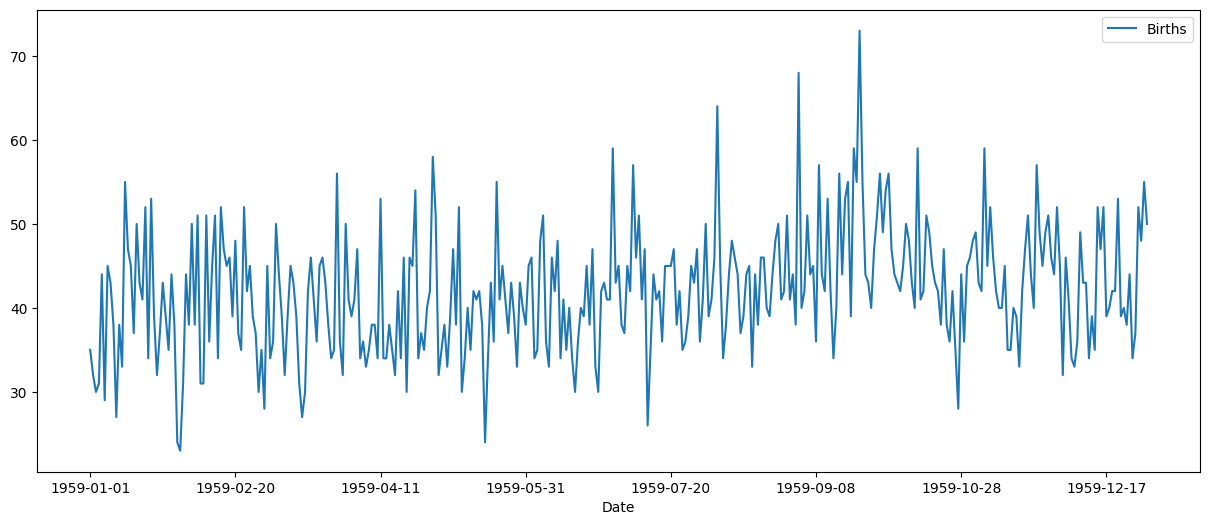

In [58]:

from matplotlib import pyplot
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
series.plot()
pyplot.show()

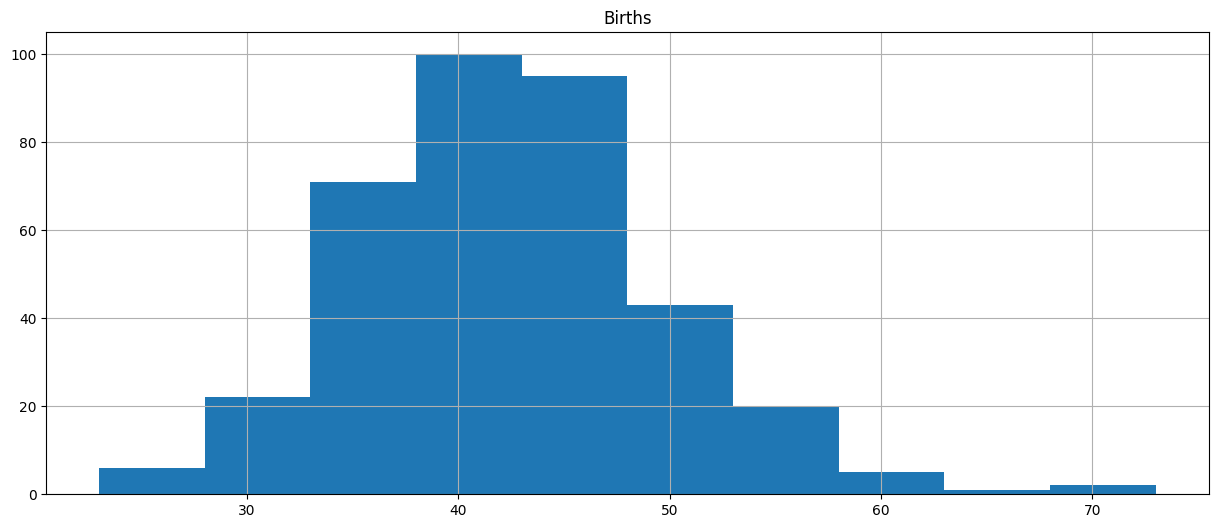

In [59]:
from matplotlib import pyplot
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
series.hist()
pyplot.show()

In [60]:
X_new = series.values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


In [61]:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [62]:
# The data contains a particular month and number of passengers travelling in that month. 
#In order to read the data as a time series, we have to pass special arguments to the 
#read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv')
print ('\n Parsed Data:')
print (data.head())

df = data.set_index(pd.to_datetime(data['Month']))

df.drop('Month', axis=1, inplace=True)
df.head()


 Parsed Data:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [63]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [64]:
#Convert to timeseries
ts = df['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [65]:
#Indexing time series arrays
ts['1949-01-01']

112

In [66]:
#Import datetime library and use 'datetime' function
from datetime import datetime
ts[datetime(1949,1,1)]

112

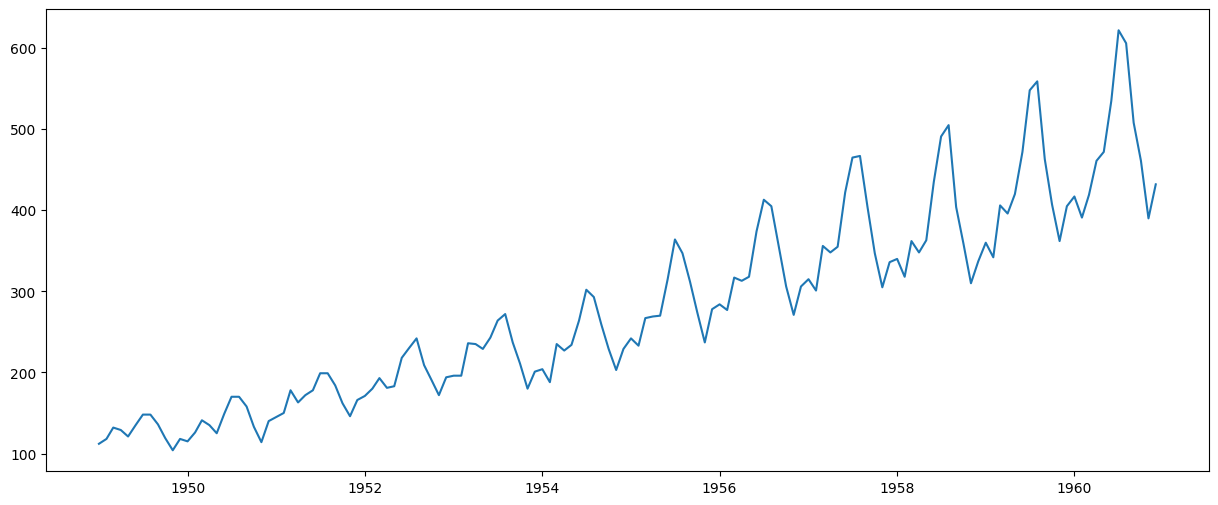

In [67]:
#GET RANGE
#PLOTTING THE TIME SERIES
plt.plot(ts)


## SUMMARY STATISTICS

In [68]:
from pandas import read_csv
#series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
X_new = df.values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


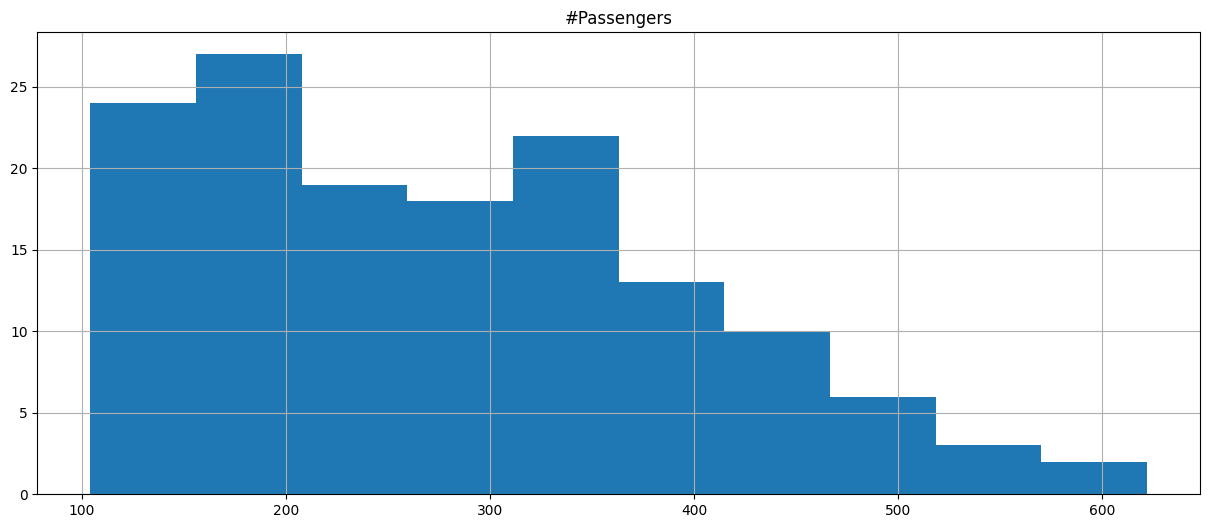

In [69]:
from pandas import read_csv
from matplotlib import pyplot
df.hist()
pyplot.show()

- Values not looking like Gaussian, therefore mean & variance values are less meaningful
- This squashed distribution of the observations may be another indicator of a non-stationary time series.

- Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, 
    and it looks like the seasonality component is growing.
- This may suggest an exponential growth from season to season. 
- A log transform can be used to flatten out exponential change back to a linear relationship.

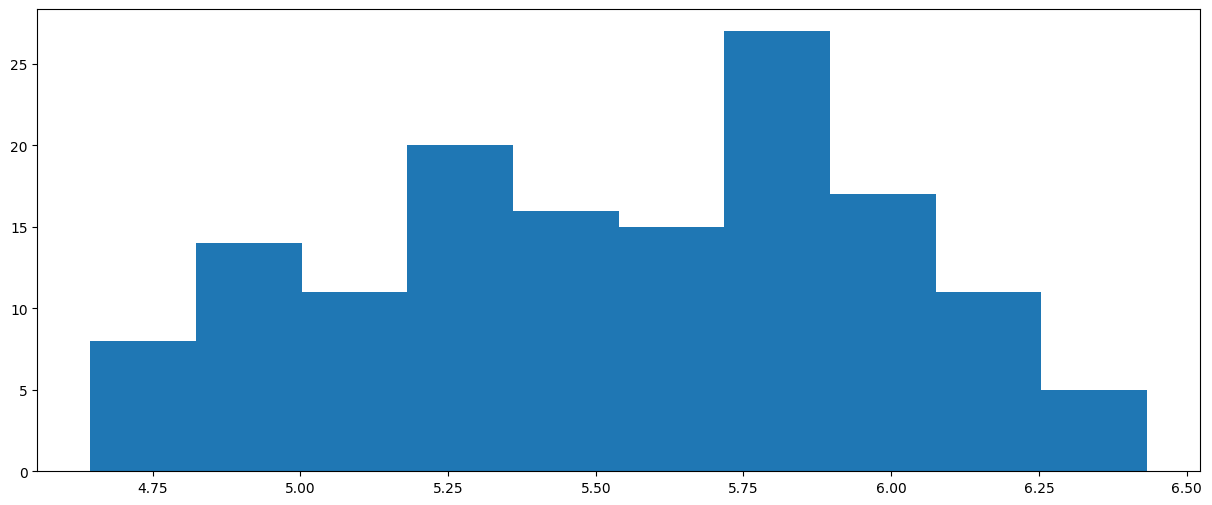

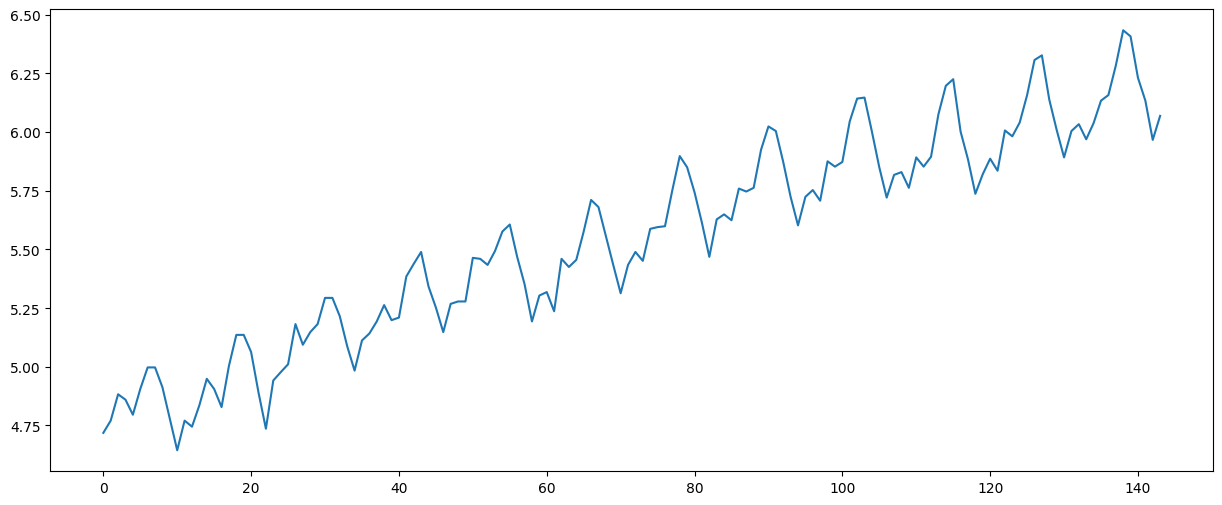

In [70]:
from numpy import log
X_log = log(df.values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

In [71]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.
X_new_log = df.values
X_new_log = log(X_new_log)
split_log = len(X_new_log) / 2
X1_log, X2_log = X_new_log[0:int(split_log)], X_new_log[int(split_log):]
mean1_log, mean2_log = X1_log.mean(), X2_log.mean()
var1_log, var2_log = X1_log.var(), X2_log.var()
print('mean1=%f, mean2=%f' % (mean1_log, mean2_log))
print('variance1=%f, variance2=%f' % (var1_log, var2_log))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


- This is a quick and dirty method that may be easily fooled.

- We can use a statistical test to check if the difference between two samples of Gaussian random 
    variables is real or a statistical fluke. We could explore statistical significance tests, like the 
    Student t-test, but things get tricky because of the serial correlation between values.

## STATISTICAL TEST

### Augmented Dickey Fuller Test

In [72]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    from pandas import read_csv
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

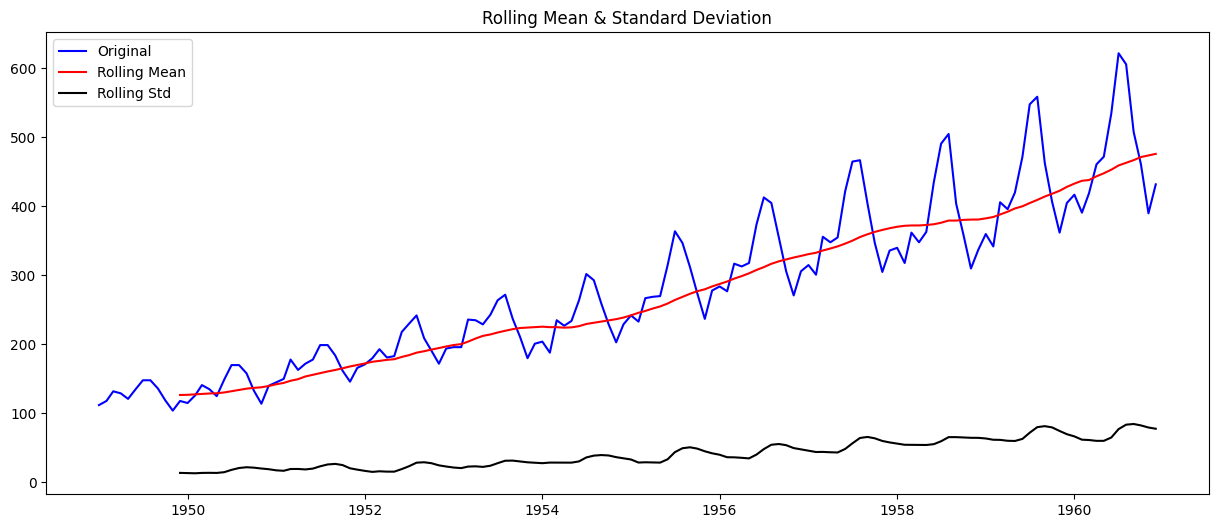

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [73]:
test_stationarity(ts)

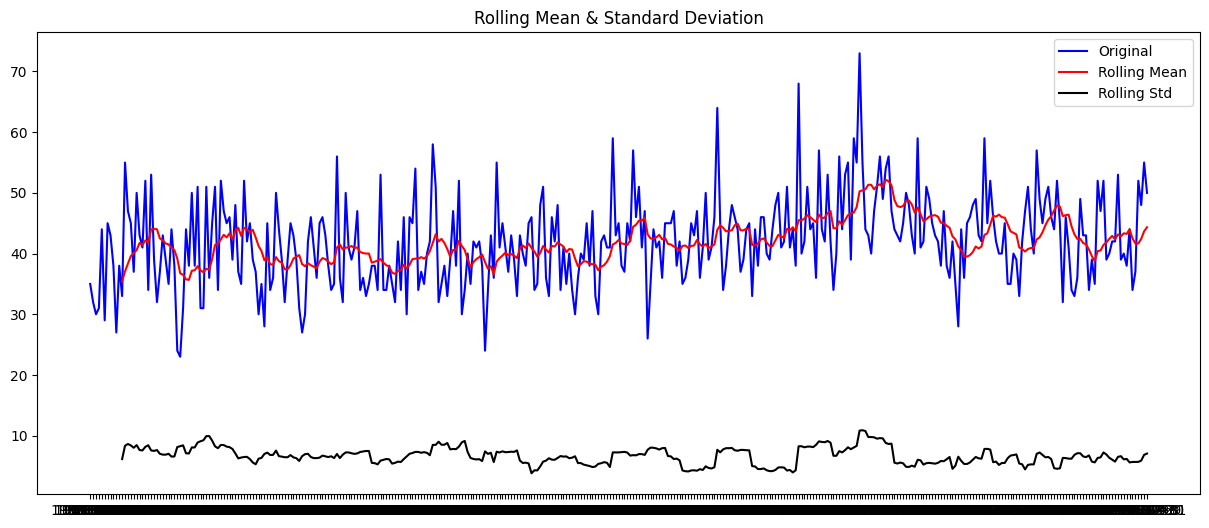

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


In [74]:
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
series.head()
ts = series["Births"]
test_stationarity(ts)

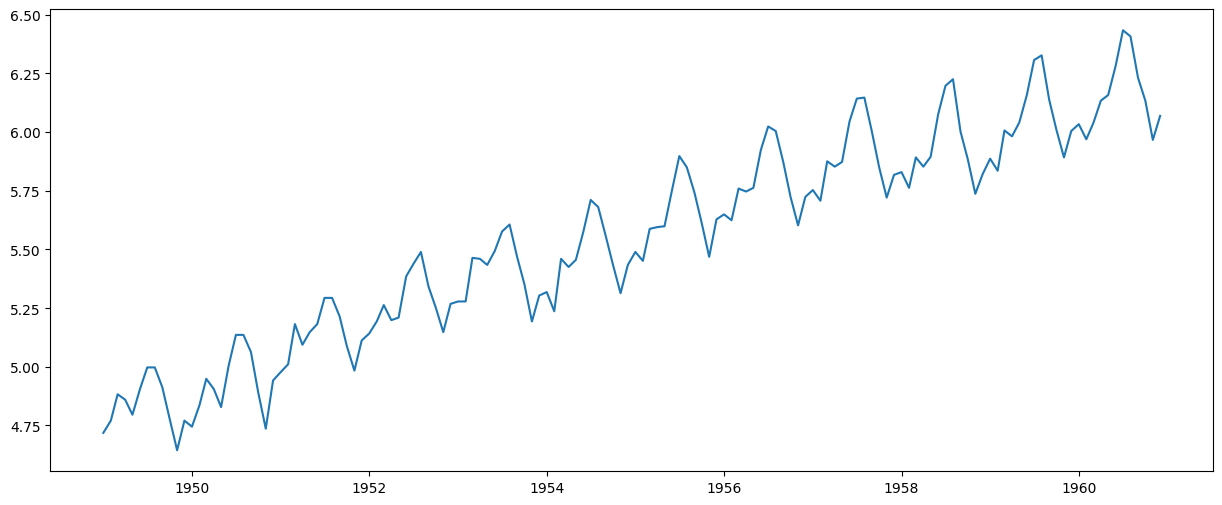

In [75]:
#MAKING TS STATIONARY
ts=df['#Passengers']
ts_log = np.log(ts)
plt.plot(ts_log)


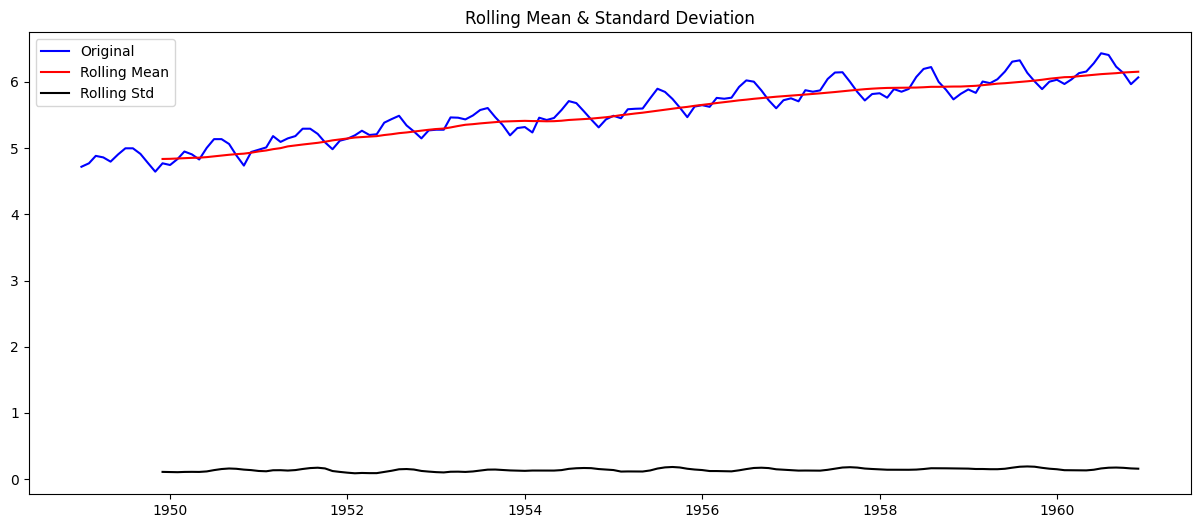

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [76]:
test_stationarity(ts_log)

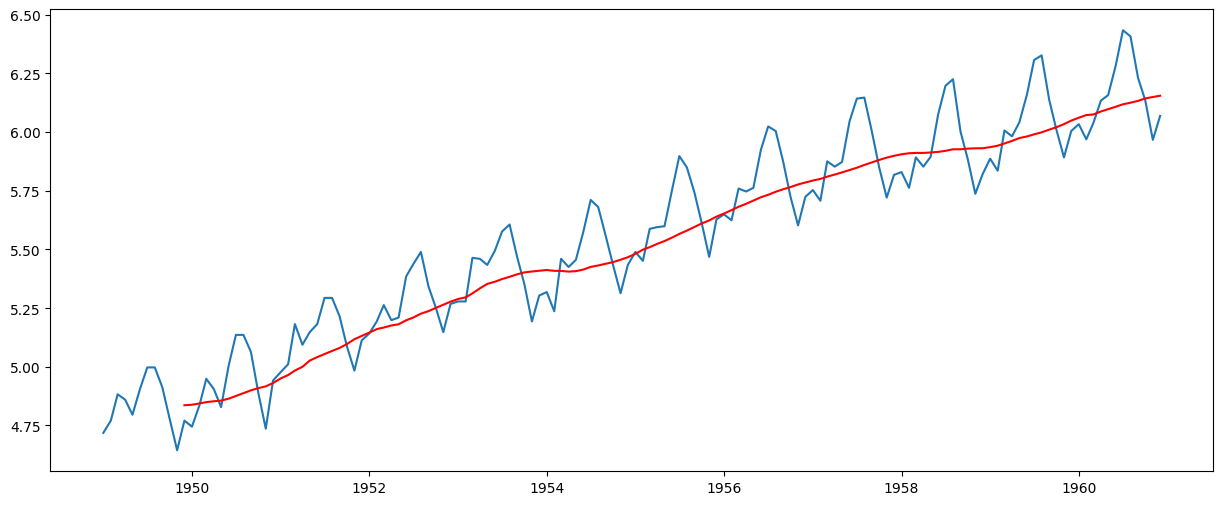

In [77]:
#Smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [78]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [79]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

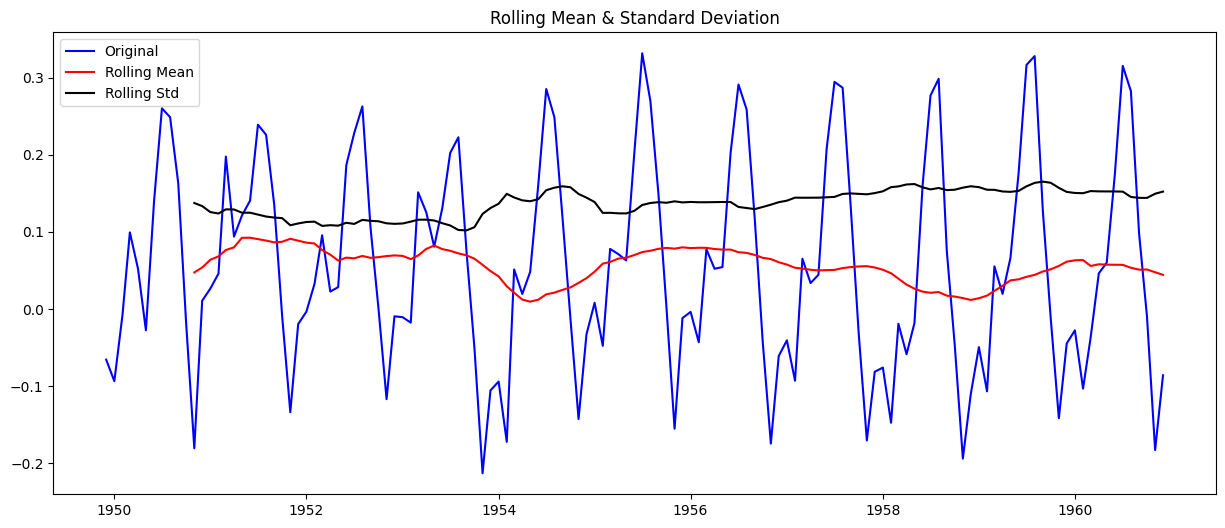

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [80]:
#TEST STATIONARITY AGAIN
test_stationarity(ts_log_moving_avg_diff)

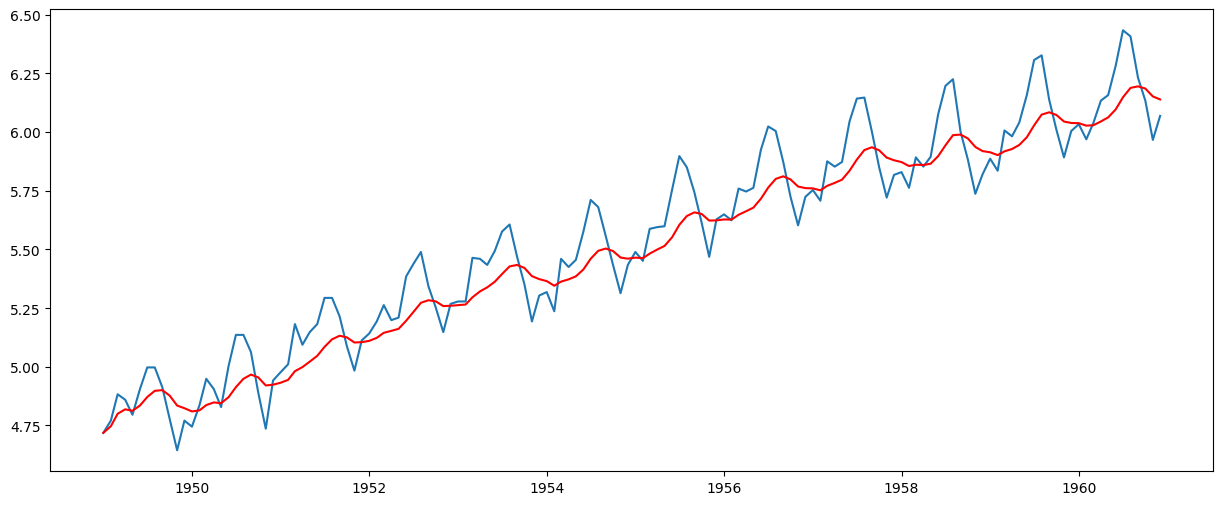

In [81]:
expwighted_avg = ts_log.ewm(span=12).mean() 
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

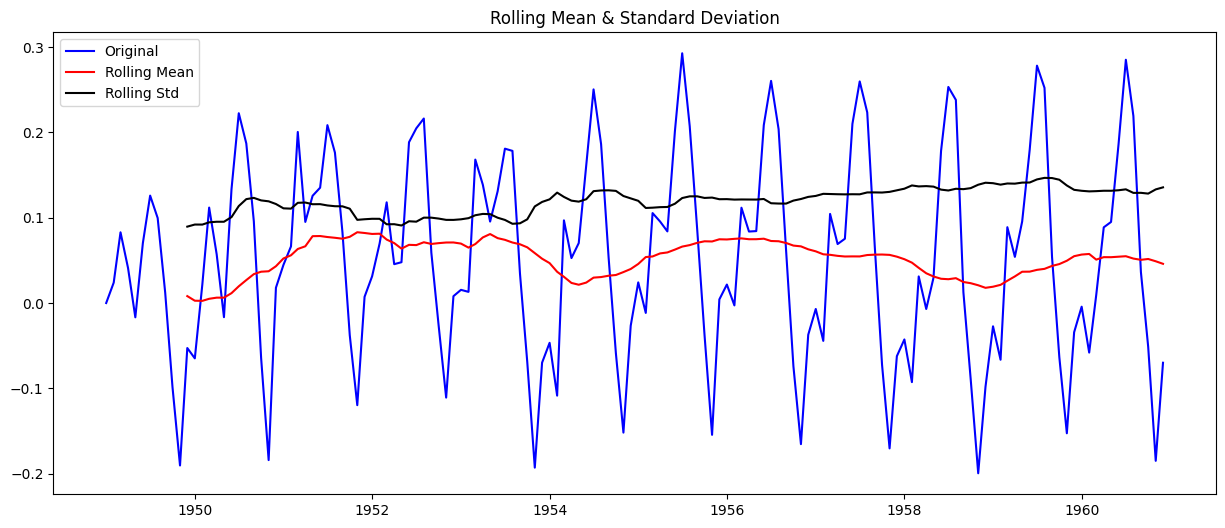

Results of Dickey-Fuller Test:
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [82]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

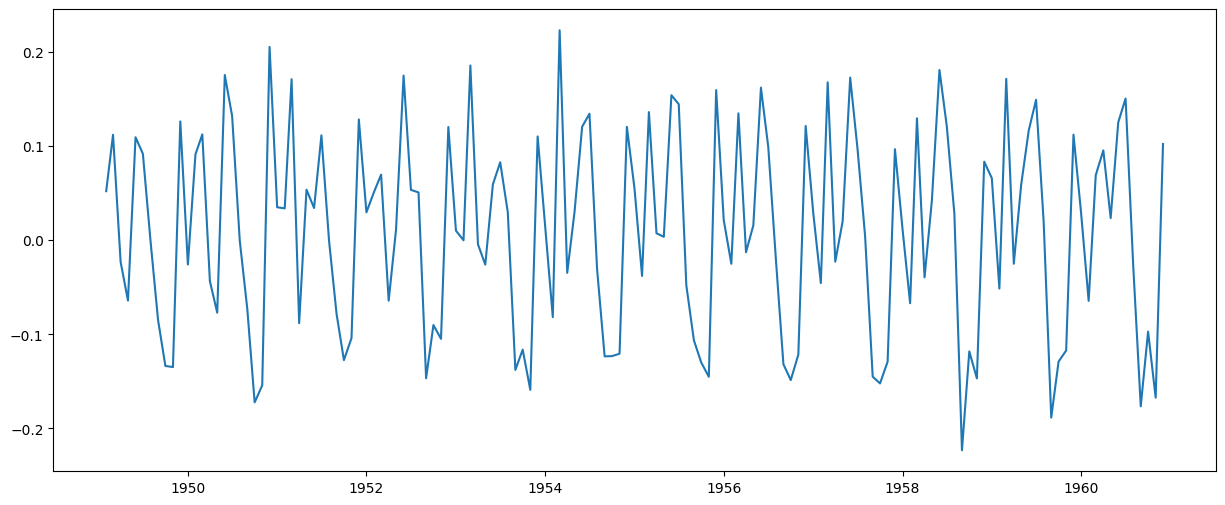

In [83]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

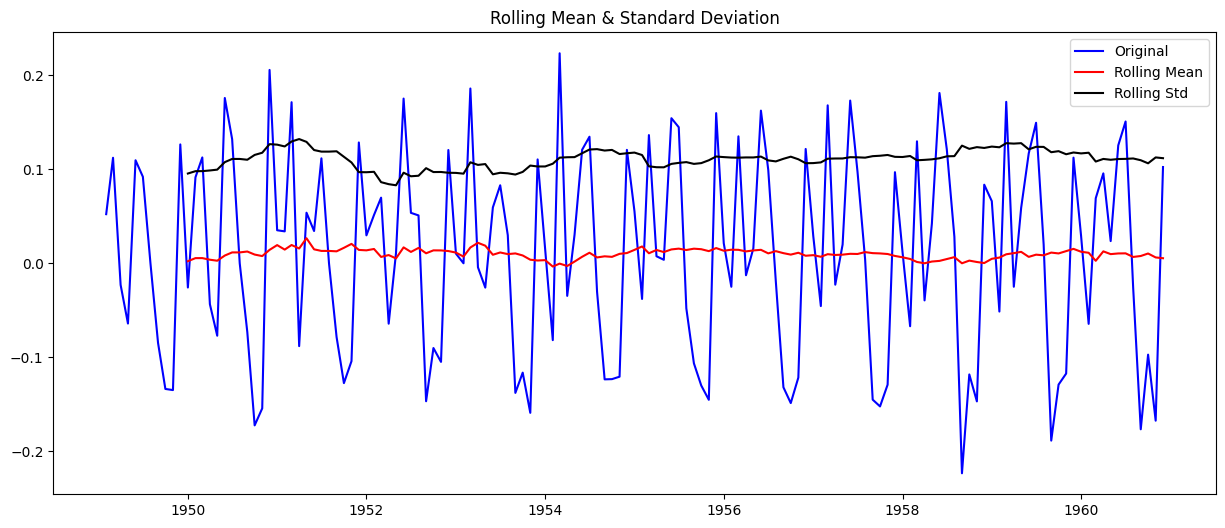

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [84]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [85]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [86]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

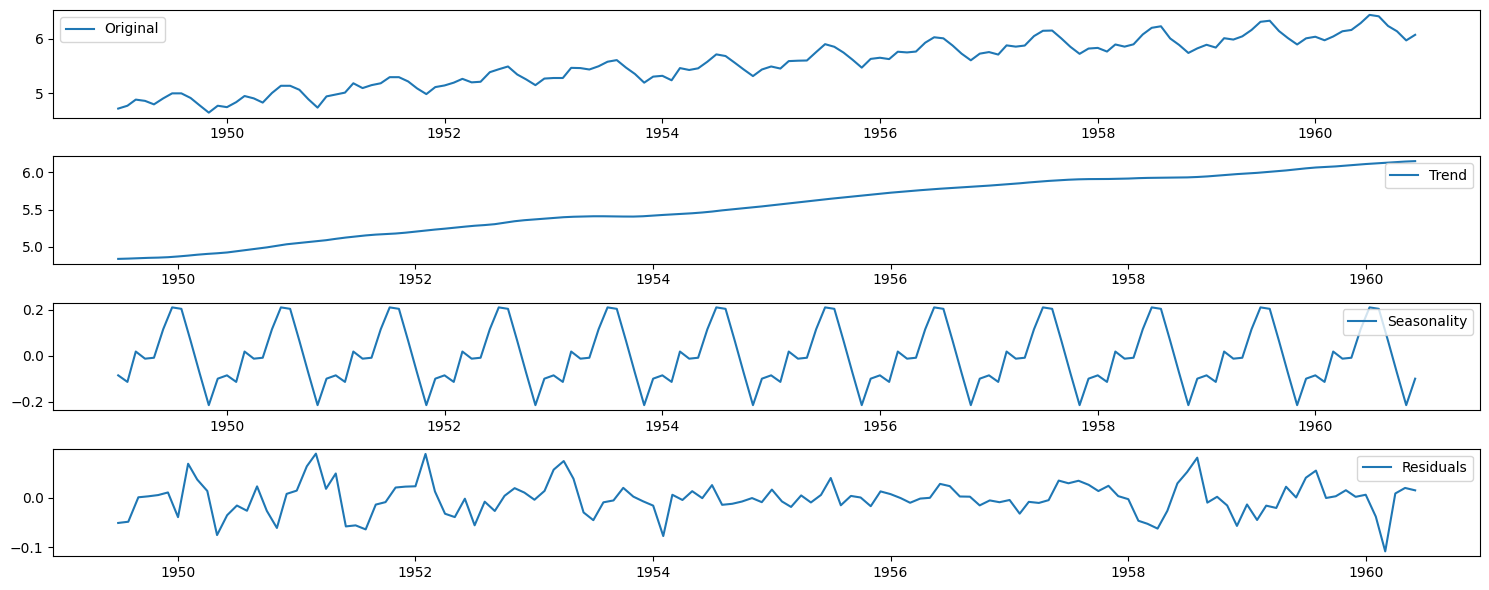

In [87]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

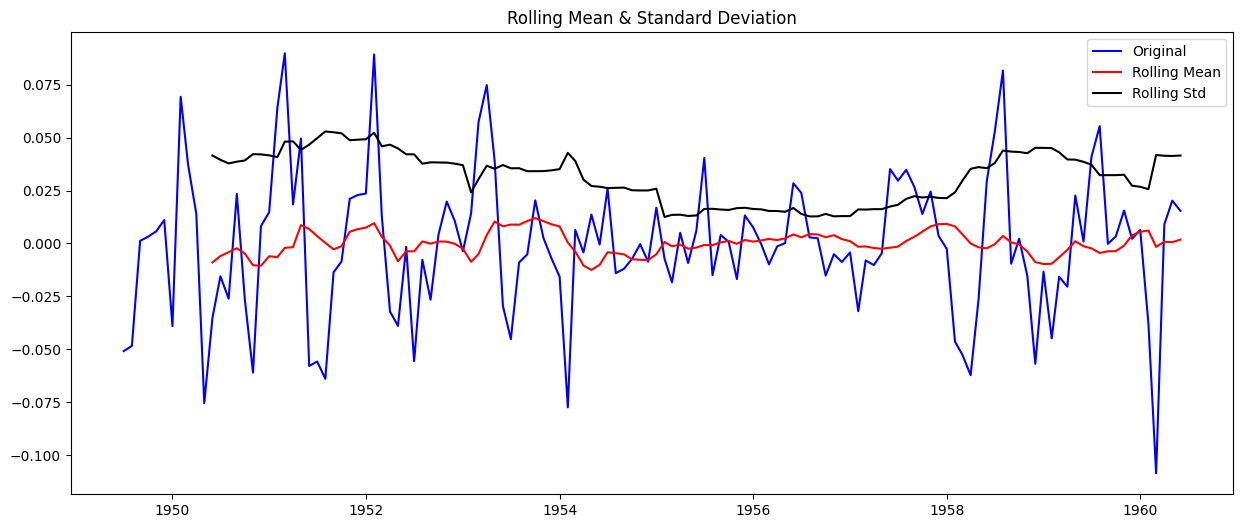

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [88]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [89]:
#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA

### ARIMA Model

An ARIMA model combines three components:
1. **AR (AutoRegressive) part**: It involves regressing the variable on its own lagged (past) values. The number of lagged observations included in the model is denoted by \( p \).
2. **I (Integrated) part**: It involves differencing the observations (subtracting an observation from the previous one) to make the time series stationary. The number of times the data needs to be differenced to achieve stationarity is denoted by \( d \).
3. **MA (Moving Average) part**: It involves modeling the error term as a linear combination of error terms at previous time points. The number of lagged forecast errors in the prediction equation is denoted by \( q \).

The general form of an ARIMA(p, d, q) model is:
\[ Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q} + \epsilon_t \]
where:
- \( Y_t \) is the value at time \( t \).
- \( c \) is a constant.
- \( \phi_i \) are the coefficients for the autoregressive terms.
- \( \theta_i \) are the coefficients for the moving average terms.
- \( \epsilon_t \) is the error term at time \( t \).

### AR Model

An AR model is a special case of ARIMA with \( d = 0 \) (no differencing) and no MA part (\( q = 0 \)). It simply regresses the variable on its own past values. An AR(p) model is given by:
\[ Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \phi_p Y_{t-p} + \epsilon_t \]

### Choosing Lags

Choosing the number of lags (\( p \) for AR and ARIMA models, \( q \) for MA in ARIMA models) is crucial for building an accurate model. Here are some common methods:

1. **Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots**:
   - **ACF Plot**: Shows the correlation of the time series with its own lagged values.
   - **PACF Plot**: Shows the partial correlation of the time series with its own lagged values, controlling for the values of the time series at all shorter lags.

   In AR models, the PACF plot is used to determine the order \( p \) by identifying the point where the partial correlation significantly decreases.

2. **Information Criteria**:
   - **Akaike Information Criterion (AIC)**
   - **Bayesian Information Criterion (BIC)**
   - **Hannan-Quinn Criterion (HQIC)**

   These criteria help in selecting the model with the best fit by balancing the goodness of fit with the complexity of the model.

3. **Cross-Validation**:
   - Split the data into training and testing sets and evaluate the performance of models with different lags on the test set.

### Practical Steps to Choose Lags

1. **Plot the ACF and PACF**:
   - Identify significant lags from the PACF plot for the AR part.
   - Identify significant lags from the ACF plot for the MA part.

2. **Estimate Models with Different Lags**:
   - Fit ARIMA models with varying \( p \), \( d \), and \( q \) values.
   - Compare the models using AIC, BIC, and other relevant metrics.

3. **Validate the Model**:
   - Perform out-of-sample validation to check the predictive performance.
   - Check the residuals to ensure they resemble white noise (no patterns left).

By combining these methods, you can effectively determine the appropriate number of lags for your ARIMA or AR model.

In [90]:
#ACF/PACF PLOTS

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

In [91]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

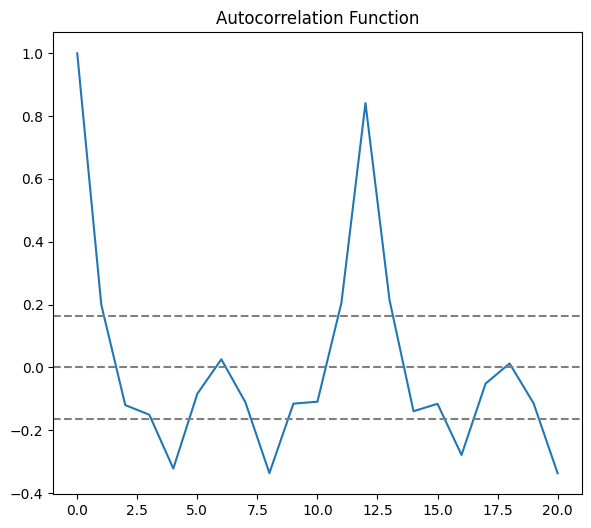

In [92]:
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

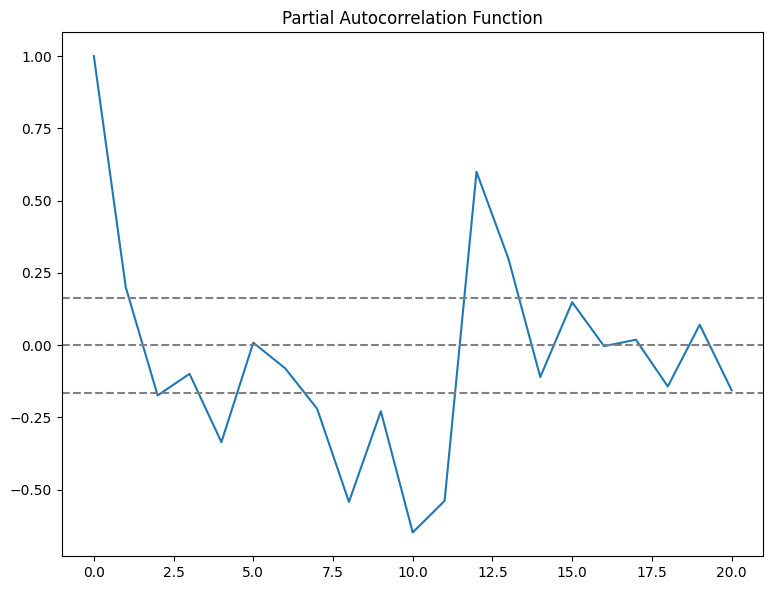

In [93]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [94]:
ts_values=ts_log.values

In [95]:
X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [96]:
#MODEL BUILDING
#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [97]:
history = [x for x in train]
predictions = list()
#test.reset_index()

#### To identify the best combination of (p,d,q), please run the last part of this code (Grid Search)

In [98]:
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

predicted=5.771883, expected=5.752573
predicted=5.722159, expected=5.707110
predicted=5.731499, expected=5.874931
predicted=5.884427, expected=5.852202
predicted=5.815896, expected=5.872118
predicted=5.924803, expected=6.045005
predicted=6.023105, expected=6.142037
predicted=6.161367, expected=6.146329
predicted=6.172625, expected=6.001415
predicted=5.892987, expected=5.849325
predicted=5.816470, expected=5.720312
predicted=5.796283, expected=5.817111
predicted=5.858296, expected=5.828946
predicted=5.794167, expected=5.762051
predicted=5.786855, expected=5.891644
predicted=5.919767, expected=5.852202
predicted=5.805455, expected=5.894403
predicted=5.932769, expected=6.075346
predicted=6.064049, expected=6.196444
predicted=6.214944, expected=6.224558
predicted=6.242372, expected=6.001415
predicted=5.890645, expected=5.883322
predicted=5.858083, expected=5.736572
predicted=5.699361, expected=5.820083
predicted=5.928216, expected=5.886104
predicted=5.904791, expected=5.834811
predicted=5.

In [99]:
#CHECKING ERROR
from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

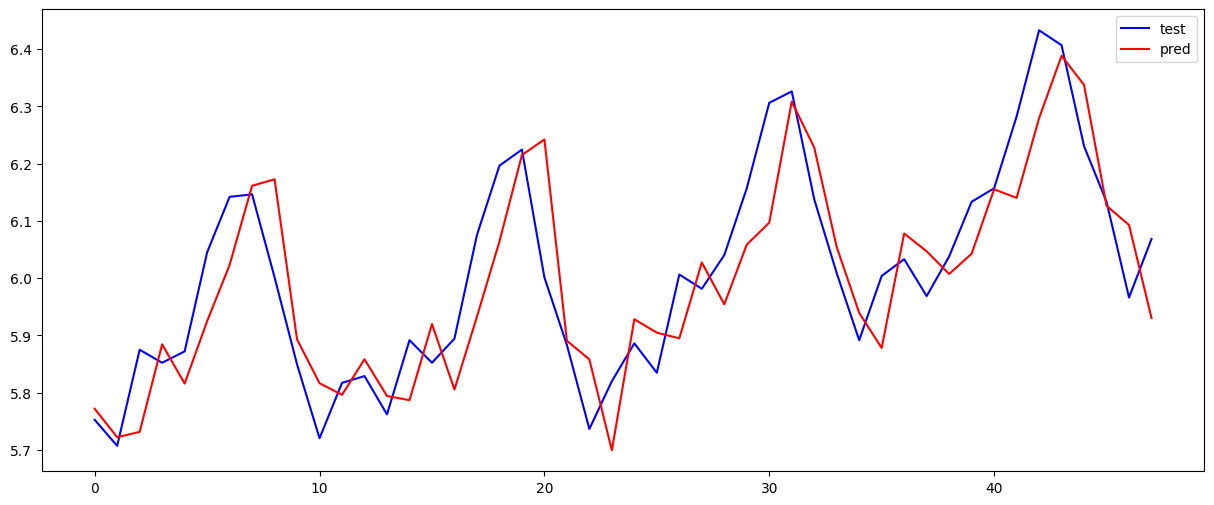

In [100]:
# plot
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.legend()
pyplot.show()

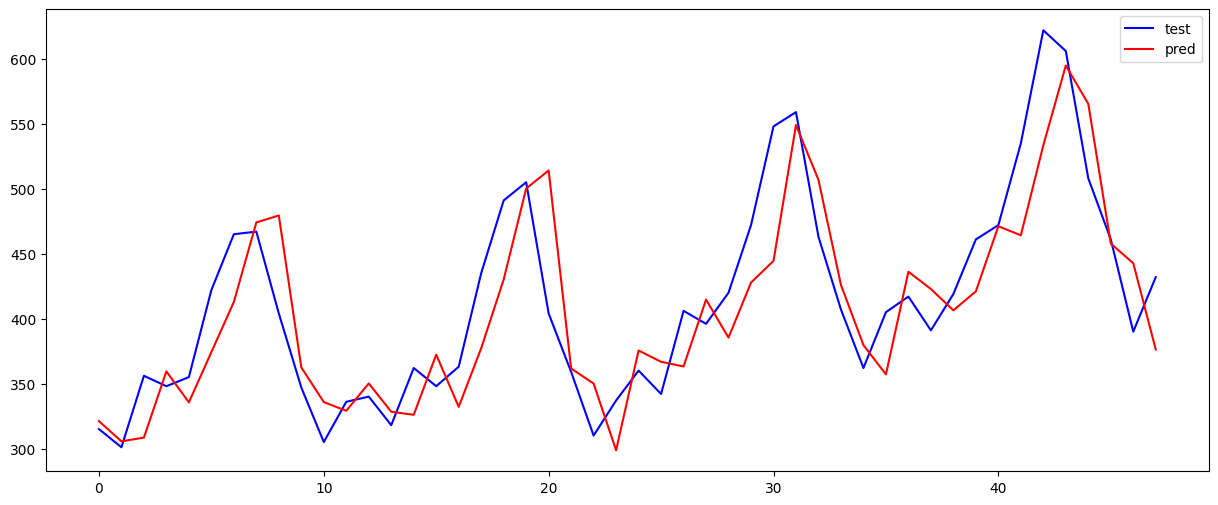

In [101]:
# plot
pyplot.plot(np.exp(test), color = 'blue', label='test')   
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.legend()
pyplot.show()

In [102]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 42.65


## AUTO ARIMA

In [103]:

from pmdarima.arima import auto_arima

In [104]:
arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1, 
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1, 
                         seasonal=True, stationary=False, information_criterion='aic', 
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, 
                         n_jobs=1, start_params=None, trend=None, method='lbfgs', 
                         maxiter=50, offset_test_args=None, seasonal_test_args=None, 
                         suppress_warnings=True, error_action='trace', trace=False, 
                         random=False, random_state=None, n_fits=10, 
                         return_valid_fits=False, out_of_sample_size=0, 
                         scoring='mse', scoring_args=None, with_intercept='auto', 
                         sarimax_kwargs=None)


In [105]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(4, 1, 2)   Log Likelihood                  98.203
Date:                Wed, 18 Sep 2024   AIC                           -180.407
Time:                        11:47:35   BIC                           -159.976
Sample:                             0   HQIC                          -172.151
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0115      0.002      4.651      0.000       0.007       0.016
ar.L1          0.0392      0.146      0.269      0.788      -0.246       0.324
ar.L2          0.4211      0.150      2.806      0.005       0.127       0.715
ar.L3         -0.2907      0.122     -2.390      0.017      -0.529      -0.052
ar.L4         -0.1915      0.121     -1.583      0.113      -0.429       0.046
ma.L1         -0.0675      0.114     -0.592      0.554      -0.291       0.156
ma.L2         -0.8834      0.120     -7.354      0.000      -1.119      -0.648
sigma2         0.0071      0.002      4.163      0.000       0.004       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 4.19
Prob(Q):                              0.58   Prob(JB):                         0.12
Heteroskedasticity (H):               0.83   Skew:                             0.16
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['predicted_sales']

In [107]:
np.exp(prediction_arima_model)  

,predicted_sales
0,343.411284
1,365.801108
2,384.759746
3,378.395677
4,375.272763
5,366.889874
6,367.749024
7,370.600388
8,378.458892
9,385.819161


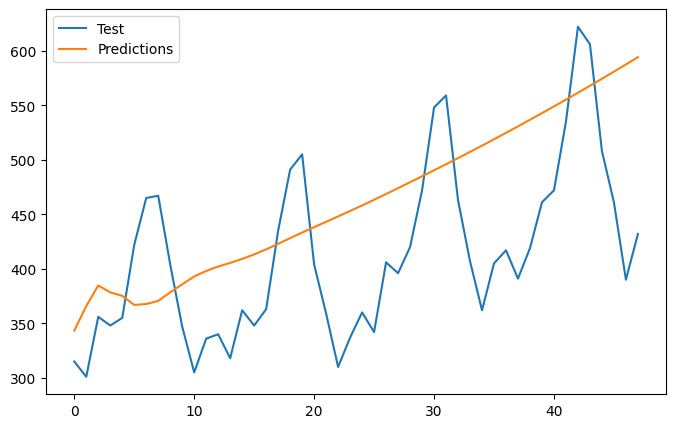

In [108]:
plt.figure(figsize=(8,5))
#plt.plot(train, label='Training')
plt.plot(np.exp(test), label='Test')
plt.plot(np.exp(prediction_arima_model), label='Predictions')
plt.legend(loc = 'upper left')
plt.show()


## Grid Search

##########################################################################
##########################################################################
####################DETERMINE PDQ VALUES - DONOT RUN###################
##########################################################################
##########################################################################

In [109]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.8)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [110]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [111]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [112]:
import datetime
print(datetime.datetime.now())
p_values = [1,2,3,4,5]
d_values = [0,1]
q_values = [1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2024-09-18 11:47:35.877744
Best ARIMANone MSE=inf
2024-09-18 11:47:35.949865
